# ACML Assignment 1B - Ziyaad Ballim (Student No. 1828251)

Import libraries

In [147]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# About the data
This dataset was found online. The dataset was already split into training and testing data with a 70/30 split so it was left as is in the two csv files. 
This data is single featured with continuous data making ideal for the linear regression which we are to implement. Slight cleaning was applied to the data in order to eliminate null/missing values and to deal with extreme outlieres that would affect the computations. 

Read in data file

In [148]:
traindf=pd.read_csv('train.csv')
ydf=traindf['y']
xdf= traindf['x']

testdf=pd.read_csv('test.csv')
ydftest=testdf['y']
xdftest=testdf['x']

In [149]:
traindf.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [150]:
testdf.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


# Converting dataframes to numpy arrays

In [151]:
trainx=xdf.to_numpy()
trainy=ydf.to_numpy()

testx=xdftest.to_numpy()
testy=ydftest.to_numpy()

# Checking for null values

In [152]:
for i in range(len(trainx)):
    if (np.isnan(trainx[i])==True):
        trainx[i]=np.nanmean(trainx)
        print("Null found in trainx and replaced with mean")

    if (np.isnan(trainy[i])==True):
        trainy[i]=np.nanmean(trainy)
        print("Null found in trainy and replaced with mean")

for i in range(len(testx)):
    if (np.isnan(testx[i])==True):
        testx[i]=np.nanmean(testx)
        print("Null found in testx and replaced with mean")

    if (np.isnan(testy[i])==True):
        testy[i]=np.nanmean(testy)
        print("Null found in testy and replaced with mean")

# Plotting the initial training points

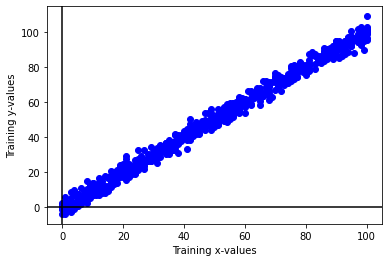

In [153]:
plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.scatter(trainx,trainy, color='blue')
plt.xlabel('Training x-values') # label horizontal axis
plt.ylabel('Training y-values') # label vertical axis
plt.show() # show the plot

# Defining functions

In [154]:
def h(designMatrix, theta_val): # Regression function
    return np.dot(designMatrix, theta_val) # linear regression using the dot product

In [155]:
def GD(trainx,trainy, alpha, e):
    theta_old=np.ones(2)
    theta_new=np.zeros(2)
    costs=[]
    while (np.linalg.norm(theta_new-theta_old) > e):
        theta_old=theta_new
        ypred=np.dot(trainx,theta_old)
        error=ypred-trainy
        cost = 1/(2*trainy.size) * np.dot(error.T, error)
        costs.append(cost)
        theta_new=theta_old- alpha*(1/(trainy.size)*np.dot(trainx.T,error))
        # print(theta_new)
    return theta_new, costs

# Gradient Descent

In [156]:
trainx=np.c_[np.ones(len(trainx)),trainx]

In [157]:
theta_new=np.ones(2)
print("Error before gradient descent")
total=np.subtract(np.dot(trainx,theta_new),trainy)
# print(total)
print(1/(2*trainy.size)*np.dot(total.T,total))
PreGDError=1/(2*trainy.size)*np.dot(total.T,total)

Error before gradient descent
4.511264121372126


In [158]:
# print(trainx)

print(trainx)
print(trainx.shape)
start_time=time.time()
theta_new, GDcosts = GD(trainx, trainy, 0.0000001,0.00001)
end_time=time.time()
time_taken_initialGD=end_time-start_time
print(time_taken_initialGD)
print(theta_new)
# print(costs)

[[ 1. 24.]
 [ 1. 50.]
 [ 1. 15.]
 ...
 [ 1. 82.]
 [ 1. 66.]
 [ 1. 97.]]
(699, 2)
0.8974995613098145
[0.01448365 0.96890115]


In [159]:
print("Error after gradient descent")
total=np.subtract(np.dot(trainx,theta_new),trainy)
# print(total)
print(1/(2*trainy.size)*np.dot(total.T,total))
PostGDError=1/(2*trainy.size)*np.dot(total.T,total)

Error after gradient descent
5.431236315881504


[0.01448365 0.96890115]


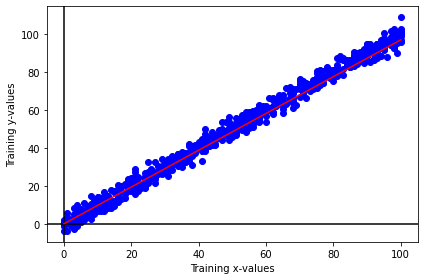

In [160]:
model_predictions=np.dot(trainx,theta_new) # for each data point obtain the predicted y value
plot_order = trainx[:,1].argsort() # this just determines the order data points need to be plotted in (don't worry too much)

print(theta_new)
plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.scatter(trainx[:,1],trainy, color='blue')
plt.xlabel('Training x-values') # label horizontal axis
plt.ylabel('Training y-values') # label vertical axis
plt.plot(trainx[:,1][plot_order],model_predictions[plot_order], color='red') # plot the regression function's predicted value for each data point and connect it with a line
plt.tight_layout()
plt.show() # show the plot

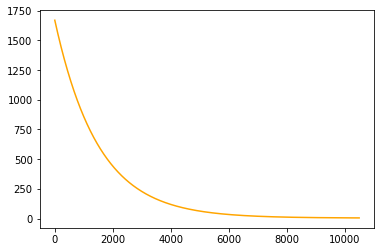

In [161]:
plt.plot(GDcosts,color='orange')

# Testing with test dataset

In [162]:
testx=np.c_[np.ones(len(testx)),testx]
ypred=np.dot(testx,theta_new)
error=ypred-testy
cost = 1/(2*testy.size) * np.dot(error.T, error)
print(cost)
TestGDError=1/(2*testy.size) * np.dot(error.T, error)

7.10702277422844


# Testing different learning rates
Learning rates from 0.1 right down to 0.1^10 were used in order to demonstrate efficiency as well as convergence of different learning rates.

In [163]:
alltheta0=[]
alltheta1=[]
allcosts=[]
times=[]
allerrors=[]
alphas=[]
for i in range(1,10):
    start_time=time.time()
    theta_new, costs = GD(trainx, trainy, 0.1**i,0.00001)
    end_time = time.time()

    total=np.subtract(np.dot(trainx,theta_new),trainy)
    error=1/(2*35)*(np.sum(np.square(total)))

    alphas.append(0.1**i)
    alltheta0.append(theta_new[0])
    alltheta1.append(theta_new[1])
    allcosts.append(costs)
    times.append(end_time-start_time)
    allerrors.append(error)



The following plot is to demonstrate the range of times taken to complete the standard gradient descent with differnt learning rates. As seen below, the smaller the learning rate, the longer the time taken to complete the calculation. However, this could be misleading as this is the time taken for the alogirthm to complete, it does not necessarily imply convergence.

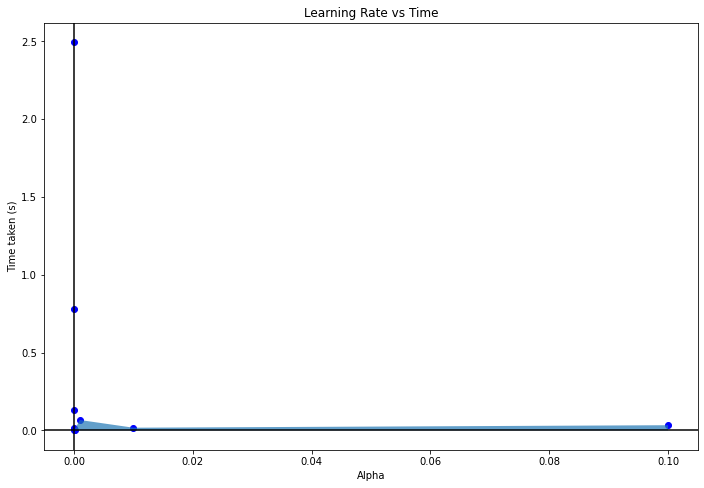

In [164]:
model_predictions=np.dot(trainx,theta_new) # for each data point obtain the predicted y value
plot_order = trainx[:,1].argsort() # this just determines the order data points need to be plotted in (don't worry too much)
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0


plt.title("Learning Rate vs Time")
plt.xlabel('Alpha') # label horizontal axis
plt.ylabel('Time taken (s)') # label vertical axis

# plt.plot(trainx[:,1][plot_order],model_predictions[plot_order], color='red') # plot the regression function's predicted value for each data point and connect it with a line
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

plt.scatter(alphas,times, color='blue')
plt.plot()
plt.fill_between(alphas,times,alpha=0.7)
plt.show() # show the plot

In [165]:
print(alltheta0)
print(alltheta1)

[nan, nan, nan, 0.014881190004462096, 0.014886319877521917, 0.014866212563433675, 0.014483654017936826, 0.010467370861277893, 4.993986917045781e-08]
[nan, nan, nan, 0.9988092495237824, 0.9985382486361299, 0.9958425099669442, 0.9689011493741307, 0.69941250560298, 3.3354245845185367e-06]


Text(0.5, 1.0, 'Alpha vs Theta')

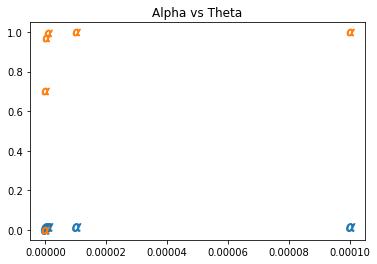

In [166]:
plt.scatter(alphas, alltheta0, s=80, marker=r'$\alpha$')
plt.scatter(alphas, alltheta1, s=60, marker=r'$\alpha$')
plt.title("Alpha vs Theta")

As seen above from the plotted theta values, there are only available paramters for smaller alhpas/learning rates (<=0.0001) which means the higher learning rates were unable to converge.

# Abnormal Alpha values

In [167]:
theta_new, costs = GD(trainx, trainy, 0.00001,0.00001)
print(theta_new)

[0.01488632 0.99853825]


# Feature scaling, standardization

In [168]:
trainx=xdf.to_numpy()
trainy=ydf.to_numpy()
mean=np.mean(trainx)
max=np.amax(trainx)
min=np.amin(trainx)
s=np.std(trainx)

In [169]:
trainx = trainx.astype('float')
for i in range(len(trainx)):
    trainx[i]=(trainx[i]-mean)/s

In [170]:
trainx=np.c_[np.ones(len(trainx)),trainx]

In [171]:
theta_new=np.ones(2)
print("Error before scaled gradient descent")
total=np.subtract(np.dot(trainx,theta_new),trainy)
# print(total)
print(1/(2*trainy.size)*np.dot(total.T,total))
PreScaledError=1/(2*trainy.size)*np.dot(total.T,total)

Error before scaled gradient descent
1592.169710885085


In [172]:
def GD(trainx,trainy, alpha, e):
    theta_old=np.ones(2)
    theta_new=np.zeros(2)
    costs=[]
    while (np.linalg.norm(theta_new-theta_old) > e):
        theta_old=theta_new
        ypred=np.dot(trainx,theta_old)
        error=ypred-trainy
        cost = 1/(2*trainy.size) * np.dot(error.T, error)
        costs.append(cost)
        theta_new=theta_old- alpha*(1/(trainy.size)*np.dot(trainx.T,error))
        # print(theta_new)
    return theta_new, costs

In [173]:
start_time=time.time()
theta_new, Scaledcosts = GD(trainx, trainy, 0.0001,0.00001)
end_time=time.time()
time_taken_ScaledGD=end_time-start_time
print(theta_new)

[49.85336808 28.90268369]


In [174]:
print(time_taken_initialGD)
print(time_taken_ScaledGD)

0.8974995613098145
5.952338457107544


In [175]:
print("Error after scaled gradient descent")
total=np.subtract(np.dot(trainx,theta_new),trainy)
# print(total)
print(1/(2*35)*(np.sum(np.square(total))))
PostScaledError=1/(2*35)*(np.sum(np.square(total)))

Error after scaled gradient descent
78.66496199939779


[49.85336808 28.90268369]


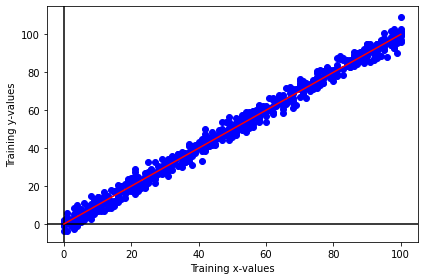

In [176]:
model_predictions=np.dot(trainx,theta_new) # for each data point obtain the predicted y value
plot_order = trainx[:,1].argsort() # this just determines the order data points need to be plotted in (don't worry too much)

trainx=xdf.to_numpy()
trainx=np.c_[np.ones(len(trainx)),trainx]

print(theta_new)
plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.scatter(trainx[:,1],trainy, color='blue')
plt.xlabel('Training x-values') # label horizontal axis
plt.ylabel('Training y-values') # label vertical axis
plt.plot(trainx[:,1][plot_order],model_predictions[plot_order], color='red') # plot the regression function's predicted value for each data point and connect it with a line
plt.tight_layout()
plt.show() # show the plot

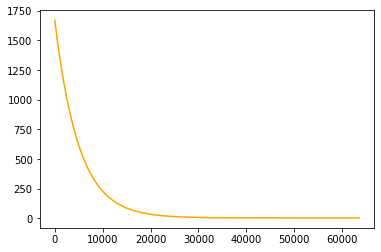

In [177]:
# print(costs)
plt.plot(Scaledcosts,color='orange')

In [178]:
ypred=np.dot(testx,theta_new)
error=ypred-testy
cost = 1/(2*testy.size) * np.dot(error.T, error)
print(cost)
TestScaledError=1/(2*testy.size) * np.dot(error.T, error)

1396620.8941884697


# Implementing Regularization

In [179]:
trainx=xdf.to_numpy()
trainx=np.c_[np.ones(len(trainx)),trainx]


In [180]:
theta_new=np.ones(2)
print("Error before gradient descent with regularization")
total=np.subtract(np.dot(trainx,theta_new),trainy)
# print(total)
print(1/(2*35)*(np.sum(np.square(total))))
PreGDRError=(1/(2*35)*(np.sum(np.square(total))))

Error before gradient descent with regularization
90.09638916683188


In [181]:
def GDR(trainx,trainy, alpha, e, lam):
    theta_old=np.ones(2)
    theta_new=np.zeros(2)
    costs=[]
    while (np.linalg.norm(theta_new-theta_old) > e):
        theta_old=theta_new
        ypred=np.dot(trainx,theta_old)
        error=ypred-trainy
        cost = 1/(2*trainy.size) * np.dot(error.T, error)
        costs.append(cost)
        theta_new=theta_old*(1-alpha*(lam/len(trainx)))- alpha*(1/(trainy.size)*np.dot(trainx.T,error))
        # print(theta_new)
    return theta_new, costs

In [182]:
start_time=time.time()
theta_new, Rcosts = GDR(trainx, trainy, 0.0001,0.00001,10)
end_time=time.time()
time_taken_GDR=end_time-start_time
print(theta_new)

[0.01488113 0.99880497]


In [183]:
print(time_taken_initialGD)
print(time_taken_ScaledGD)
print(time_taken_GDR)

0.8974995613098145
5.952338457107544
0.003209829330444336


In [184]:
print("Error after scaled gradient descent")
total=np.subtract(np.dot(trainx,theta_new),trainy)
# print(total)
print(1/(2*35)*(np.sum(np.square(total))))
PostGDRError=1/(2*35)*(np.sum(np.square(total)))

Error after scaled gradient descent
78.6025049298349


[0.01488113 0.99880497]


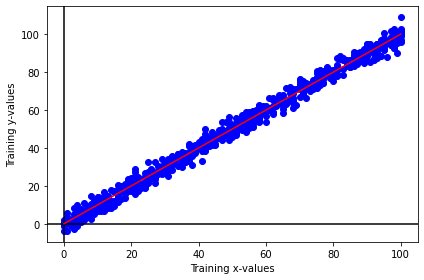

In [185]:
model_predictions=np.dot(trainx,theta_new) # for each data point obtain the predicted y value
plot_order = trainx[:,1].argsort() # this just determines the order data points need to be plotted in (don't worry too much)

trainx=xdf.to_numpy()
trainx=np.c_[np.ones(len(trainx)),trainx]

print(theta_new)
plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.scatter(trainx[:,1],trainy, color='blue')
plt.xlabel('Training x-values') # label horizontal axis
plt.ylabel('Training y-values') # label vertical axis
plt.plot(trainx[:,1][plot_order],model_predictions[plot_order], color='red') # plot the regression function's predicted value for each data point and connect it with a line
plt.tight_layout()
plt.show() # show the plot

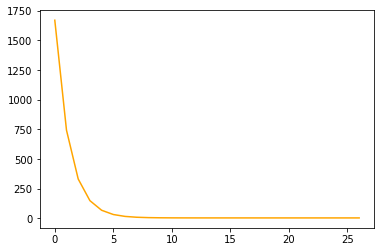

In [186]:
# print(costs)
plt.plot(Rcosts,color='orange')

In [187]:
ypred=np.dot(testx,theta_new)
error=ypred-testy
cost = 1/(2*testy.size) * np.dot(error.T, error)
print(cost)
TestGDRError=1/(2*testy.size) * np.dot(error.T, error)

4.729216740168552


# Comparisons

Comparing the cost functions

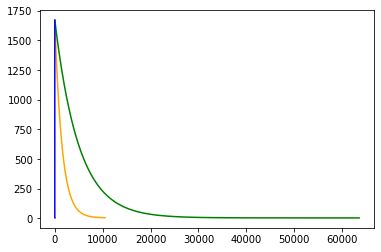

In [188]:
plt.plot(GDcosts,color='orange')
plt.plot(Scaledcosts,color='green')
plt.plot(Rcosts,color='blue')

In [189]:
# assign data
ErrorData = [
    ["Standard Gradient Descent",PreGDError, PostGDError,((PreGDError-PostGDError)/PostGDError)*100, TestGDError],
    ["Scaled Gradient Descent",PreScaledError, PostScaledError,((PreScaledError-PostScaledError)/PostScaledError)*100, TestScaledError],
    ["Gradient Descent with Regularization",PreGDRError, PostGDRError,((PreGDRError-PostGDRError)/PostGDRError)*100, TestGDRError],
]
 
# create header
head = ["Method", "Error before GD","Error after GD","Change (%)","Testing Error"]
 
# display table
print(tabulate(ErrorData, headers=head, tablefmt="grid"))

+--------------------------------------+-------------------+------------------+--------------+-----------------+
| Method                               |   Error before GD |   Error after GD |   Change (%) |   Testing Error |
+======================================+===================+==================+==============+=================+
| Standard Gradient Descent            |           4.51126 |          5.43124 |     -16.9385 |     7.10702     |
+--------------------------------------+-------------------+------------------+--------------+-----------------+
| Scaled Gradient Descent              |        1592.17    |         78.665   |    1923.99   |     1.39662e+06 |
+--------------------------------------+-------------------+------------------+--------------+-----------------+
| Gradient Descent with Regularization |          90.0964  |         78.6025  |      14.6228 |     4.72922     |
+--------------------------------------+-------------------+------------------+--------------+--

In [190]:
# print(time_taken_initialGD)
# print(time_taken_ScaledGD)
# print(time_taken_GDR)

TimeData=['Standard Gradient Descent',time_taken_initialGD],['Scaled Gradient Descent',time_taken_ScaledGD],['Gradient Descent with Regularization',time_taken_GDR]
head=['Method','Time taken to perform computation (s)']
print(tabulate(TimeData, headers=head, tablefmt="grid"))

+--------------------------------------+-----------------------------------------+
| Method                               |   Time taken to perform computation (s) |
+======================================+=========================================+
| Standard Gradient Descent            |                              0.8975     |
+--------------------------------------+-----------------------------------------+
| Scaled Gradient Descent              |                              5.95234    |
+--------------------------------------+-----------------------------------------+
| Gradient Descent with Regularization |                              0.00320983 |
+--------------------------------------+-----------------------------------------+


As seen above in the above two tables, the scaled gradient descent provides the best improved error however not the lowest. The GD with regularization proves the best in terms of testing. 

In terms of time performance, the gradient descent with regularization has the quickest time, this could be due to the fact that it helps the model converge faster.